<span style="font-size:24px;"><b>Dementia prediction notebook</b></span>

# Import and exploration and preparation of data

## Importing data

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

from joblib import dump

In [51]:
# Importing CSV
df = pd.read_csv('../data/dementia_dataset.csv')

# Printing shape
print(df.shape)

(373, 15)


In [52]:
df.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


## Data exploration

In [53]:
list(df['Group'].unique())

['Nondemented', 'Demented', 'Converted']

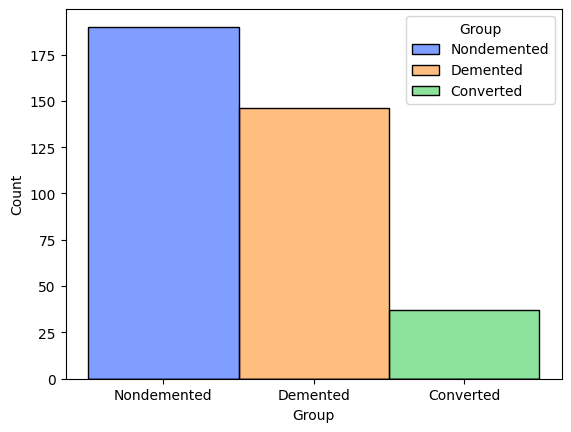

In [54]:
sns.histplot(x = df['Group'], palette='bright', hue = df['Group']);

In [112]:
df.nunique()

Subject ID    136
MRI ID        336
Group           2
Visit           5
MR Delay      182
M/F             2
Hand            1
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          265
nWBV          132
ASF           245
dtype: int64

## Data preparation

In [55]:
df_convert = df[df['Group'] == 'Converted']
df_convert.shape

(37, 15)

In [56]:
len(df_convert['Subject ID'].unique())

14

In [57]:
df = df.drop(df_convert.index)

In [121]:
#Transforming converted into Demented / Nondemented

# Creating a new column 'Last_Visit' to identify the last visit for each patient
df_convert['Last_Visit'] = df_convert.groupby('Subject ID')['Visit'].transform('max')

# Updating the 'Group' column based on 'Visit' and 'Last_Visit' conditions
df_convert.loc[df_convert['Visit'] < df_convert['Last_Visit'], 'Group'] = 'Nondemented'
df_convert.loc[df_convert['Visit'] == df_convert['Last_Visit'], 'Group'] = 'Demented'

# Dropping the 'Last_Visit' column
df_convert.drop('Last_Visit', axis=1, inplace=True)

dementia_df = pd.concat([df, df_convert])
dementia_df['Group'].unique()

array(['Nondemented', 'Demented'], dtype=object)

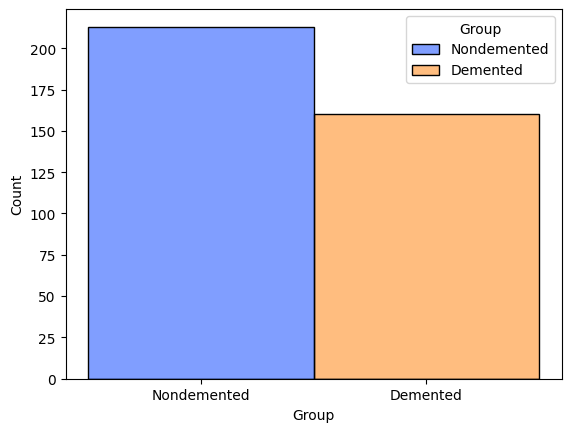

In [122]:
sns.histplot(x = dementia_df['Group'], palette='bright', hue=dementia_df['Group']);

In [123]:
dementia_df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,OAS2_0145,OAS2_0145_MR1,Nondemented,1,0,F,R,68,16,3.0,30.0,0.0,1298,0.799,1.352
298,OAS2_0145,OAS2_0145_MR2,Demented,2,1707,F,R,73,16,3.0,29.0,0.5,1287,0.771,1.364
346,OAS2_0176,OAS2_0176_MR1,Nondemented,1,0,M,R,84,16,2.0,30.0,0.0,1404,0.710,1.250
347,OAS2_0176,OAS2_0176_MR2,Nondemented,2,774,M,R,87,16,2.0,30.0,0.0,1398,0.696,1.255


In [124]:
dementia_df_filtered = dementia_df[['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

In [125]:
dementia_df_filtered

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
297,Nondemented,F,68,16,3.0,30.0,0.0,1298,0.799,1.352
298,Demented,F,73,16,3.0,29.0,0.5,1287,0.771,1.364
346,Nondemented,M,84,16,2.0,30.0,0.0,1404,0.710,1.250
347,Nondemented,M,87,16,2.0,30.0,0.0,1398,0.696,1.255


In [126]:
dementia_df_filtered.isna().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [127]:
# Imputing missing values
dementia_df_filtered.SES.fillna(dementia_df_filtered.SES.mode()[0], inplace=True) #socioeconomic status > mode
dementia_df_filtered.MMSE.fillna(dementia_df_filtered.MMSE.mean(), inplace=True) #cranial volume > mean

/var/folders/jf/x853gdbx5l504ym_yjk4kbn80000gn/T/ipykernel_7985/1249312779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dementia_df_filtered.SES.fillna(dementia_df_filtered.SES.mode()[0], inplace=True) #socioeconomic status > mode
/var/folders/jf/x853gdbx5l504ym_yjk4kbn80000gn/T/ipykernel_7985/1249312779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dementia_df_filtered.MMSE.fillna(dementia_df_filtered.MMSE.mean(), inplace=True) #cranial volume > mean


In [128]:
dementia_df_filtered.isna().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [129]:
dementia_df_filtered

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
297,Nondemented,F,68,16,3.0,30.0,0.0,1298,0.799,1.352
298,Demented,F,73,16,3.0,29.0,0.5,1287,0.771,1.364
346,Nondemented,M,84,16,2.0,30.0,0.0,1404,0.710,1.250
347,Nondemented,M,87,16,2.0,30.0,0.0,1398,0.696,1.255


In [130]:
#Encoding alpha data
encoder = LabelEncoder()

#Encofing M/F
dementia_df_filtered['M/F'] = encoder.fit_transform(dementia_df_filtered['M/F'].values).copy()
print(f'Sex: 0 : {encoder.classes_[0]}, 1 : {encoder.classes_[1]}')

#Encoding Group
dementia_df_filtered['Group'] = encoder.fit_transform(dementia_df_filtered['Group'].values).copy()
print(f'Group: 0 : {encoder.classes_[0]}, 1 : {encoder.classes_[1]}')

Sex: 0 : F, 1 : M
Group: 0 : Demented, 1 : Nondemented


/var/folders/jf/x853gdbx5l504ym_yjk4kbn80000gn/T/ipykernel_7985/1674950216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dementia_df_filtered['M/F'] = encoder.fit_transform(dementia_df_filtered['M/F'].values).copy()
/var/folders/jf/x853gdbx5l504ym_yjk4kbn80000gn/T/ipykernel_7985/1674950216.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dementia_df_filtered['Group'] = encoder.fit_transform(dementia_df_filtered['Group'].values).copy()


## Data exploration of cleaned data

In [131]:
df_f = dementia_df_filtered

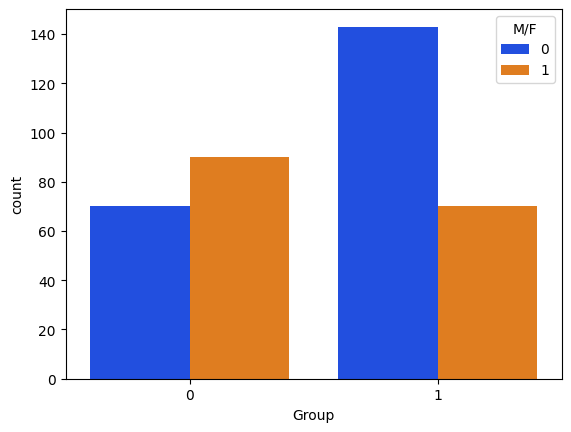

In [132]:
sns.countplot(data=df_f, x='Group', palette='bright', hue='M/F');

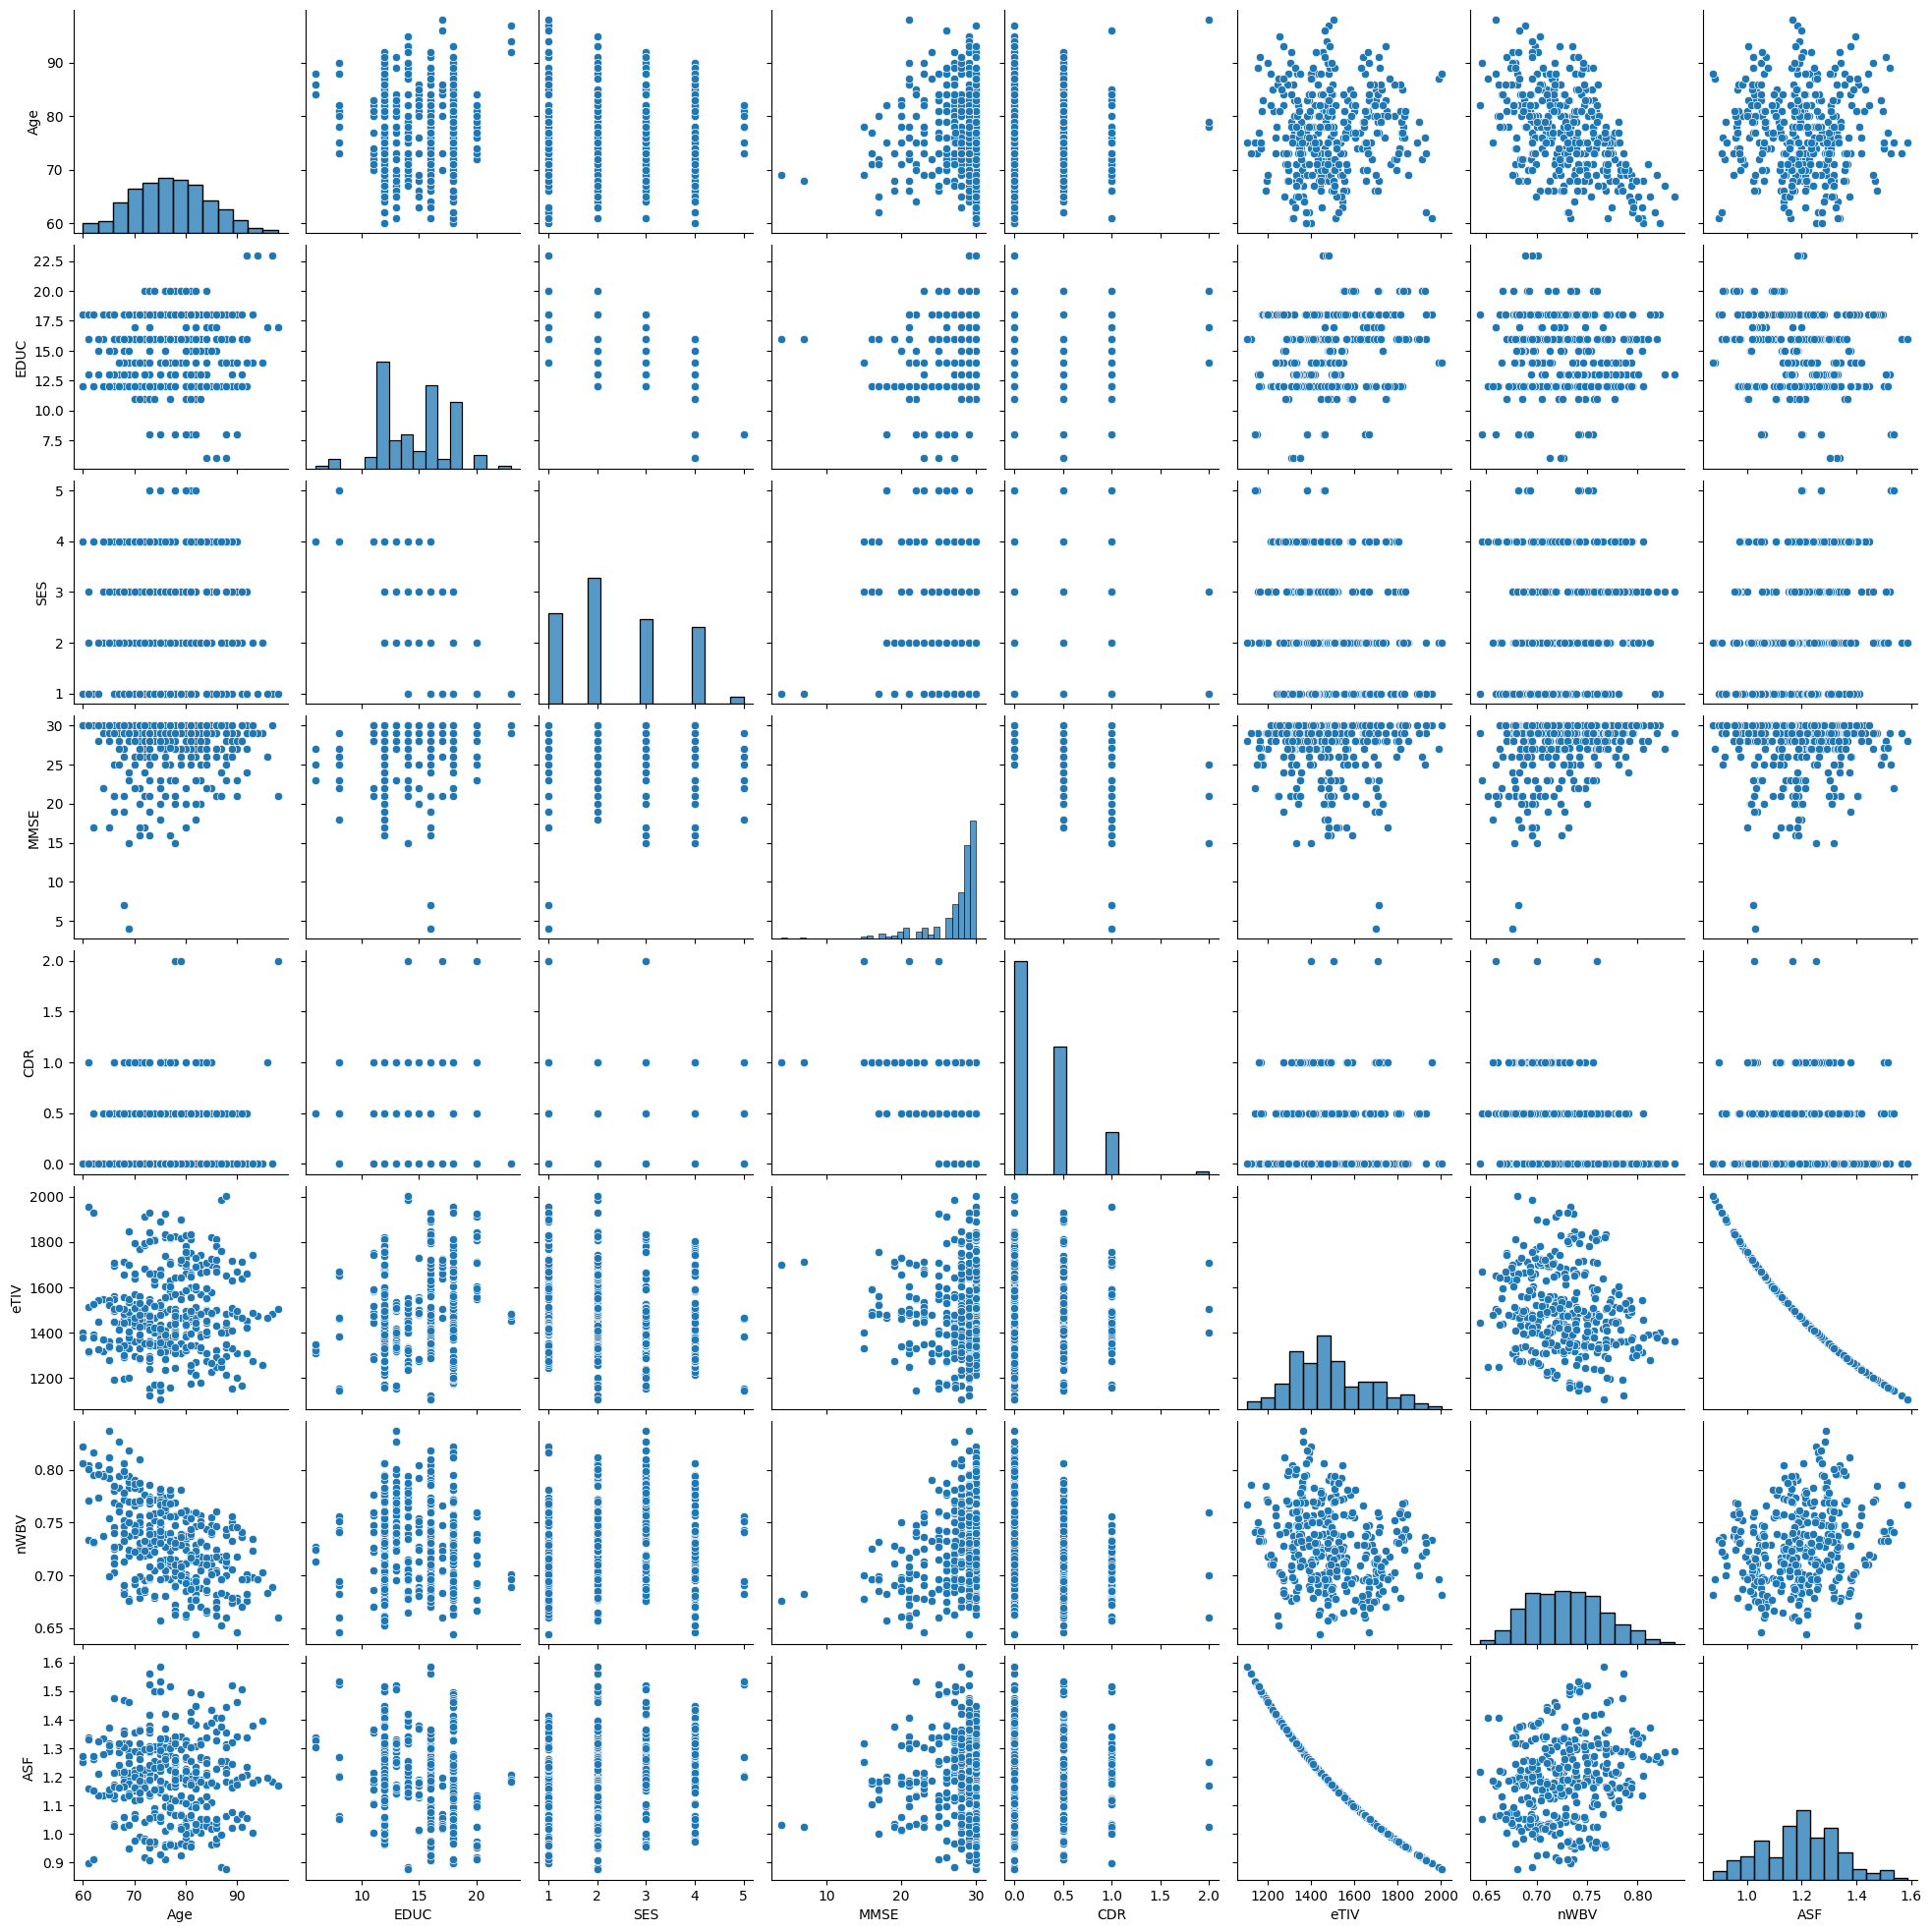

In [87]:
sns.pairplot(df_f)
plt.show()

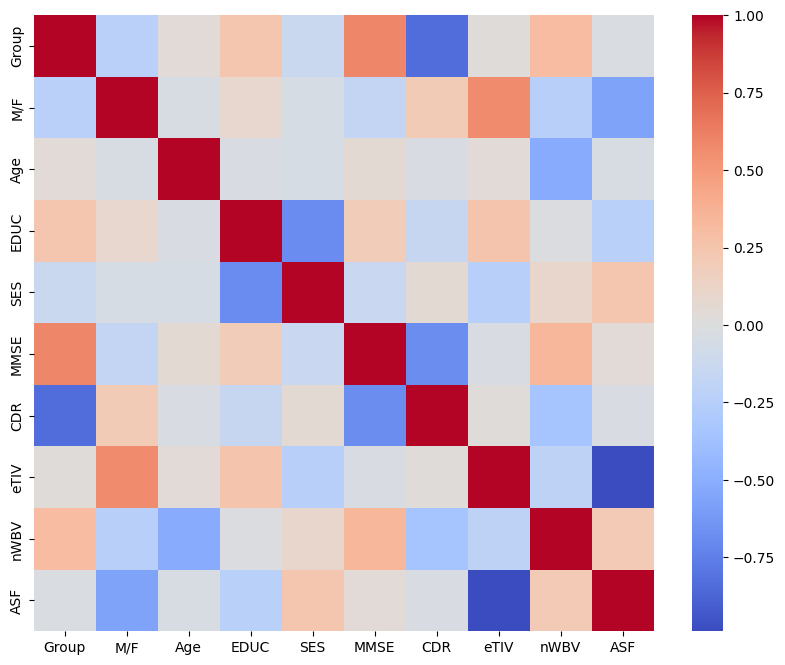

In [140]:
plt.figure(figsize = (10,8))
sns.heatmap(df_f.corr(), cmap='coolwarm');

In [141]:
#eTIV and ASF are highly correlated, dropping ASF
df_f.drop(columns=['ASF'], inplace=True)
df_f

/var/folders/jf/x853gdbx5l504ym_yjk4kbn80000gn/T/ipykernel_7985/813377605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.drop(columns=['ASF'], inplace=True)


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,1,1,87,14,2.0,27.0,0.0,1987,0.696
1,1,1,88,14,2.0,30.0,0.0,2004,0.681
2,0,1,75,12,2.0,23.0,0.5,1678,0.736
3,0,1,76,12,2.0,28.0,0.5,1738,0.713
4,0,1,80,12,2.0,22.0,0.5,1698,0.701
...,...,...,...,...,...,...,...,...,...
297,1,0,68,16,3.0,30.0,0.0,1298,0.799
298,0,0,73,16,3.0,29.0,0.5,1287,0.771
346,1,1,84,16,2.0,30.0,0.0,1404,0.710
347,1,1,87,16,2.0,30.0,0.0,1398,0.696


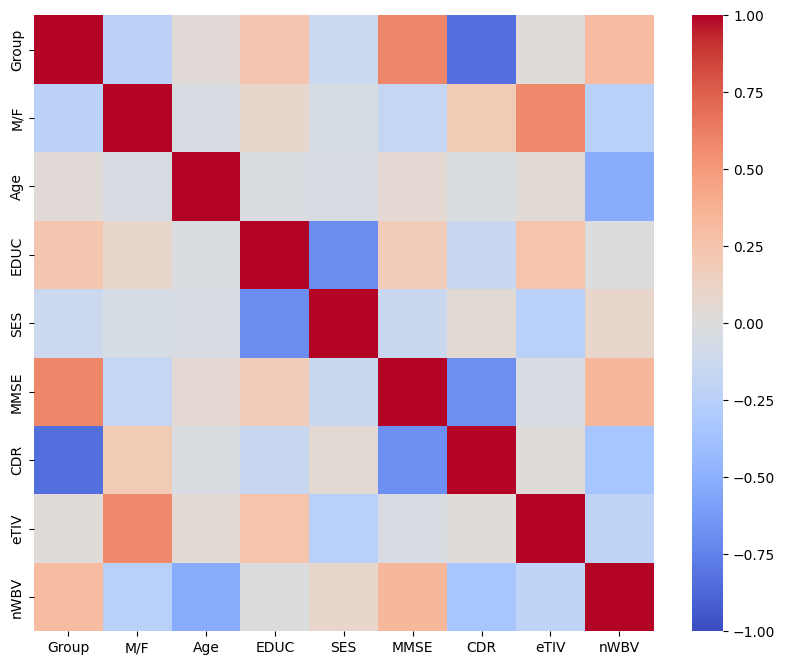

In [145]:
plt.figure(figsize = (10,8))
sns.heatmap(df_f.corr(), cmap='coolwarm', vmin=-1);

# Training models

## Simple models

In [146]:
df_f.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV'], dtype='object')

In [237]:
X = df_f.drop('Group', axis=1)
y = df_f['Group']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [239]:
#Testing logistic and random forest models
logistic_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('logistic', LogisticRegression(max_iter=10000))
])

#logistic_model = LogisticRegression(max_iter=1000)
forest_model = RandomForestClassifier()

In [240]:
logistic_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('logistic', LogisticRegression(max_iter=10000))])

In [241]:
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [242]:
y_pred_log = logistic_model.predict(X_test)
y_pref_forest = forest_model.predict(X_test)

In [274]:
#Evaluating models

#Logistic Model
print('Logistic Model')
print('Accuracy Score:', accuracy_score(y_test, y_pred_log))
print('Precision:', precision_score(y_test, y_pred_log, average='binary'))
print('Recall:', recall_score(y_test, y_pred_log, average='binary'))

#Random Forest Model
print('\nRandom Forest Model')
print('Accuracy Score:', accuracy_score(y_test, y_pref_forest))
print('Precision:', precision_score(y_test, y_pref_forest, average='binary'))
print('Recall:', recall_score(y_test, y_pref_forest, average='binary'))

Logistic Model
Accuracy Score: 0.9466666666666667
Precision: 0.9767441860465116
Recall: 0.9333333333333333

Random Forest Model
Accuracy Score: 0.9733333333333334
Precision: 1.0
Recall: 0.9555555555555556


## Stack models

In [215]:
X_train_base, X_val, y_train_base, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Train simple models
model1 = RandomForestClassifier()
model1.fit(X_train_base, y_train_base)
predictions1 = model1.predict(X_val)
pred_forest_test = model1.predict(X_test)

model2 = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('logistic', LogisticRegression(max_iter=10000))
])
model2.fit(X_train_base, y_train_base)
predictions2 = model2.predict(X_val)
pred_log_test = model2.predict(X_test)

# Use predictions of base models as features for meta-model
X_meta_train = np.column_stack((predictions1, predictions2))

# Train meta-model
meta_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('logistic', LogisticRegression(max_iter=10000))
])
meta_model.fit(X_meta_train, y_val)

# Prepare test data for meta-model
predictions1_test = model1.predict(X_test)
predictions2_test = model2.predict(X_test)
X_meta_test = np.column_stack((predictions1_test, predictions2_test))

# Use meta-model to make final predictions
ensemble_predictions = meta_model.predict(X_meta_test)

In [216]:
#Compating models


#Evaluating stack model
print('Stack Model')
print('Accuracy Score:', accuracy_score(y_test, ensemble_predictions))
print('Precision:', precision_score(y_test, ensemble_predictions, average='binary'))
print('Recall:', recall_score(y_test, ensemble_predictions, average='binary'))

#Logistic Model
print('\nLogistic Model')
print('Accuracy Score:', accuracy_score(y_test, pred_log_test))
print('Precision:', precision_score(y_test, pred_log_test, average='binary'))
print('Recall:', recall_score(y_test, pred_log_test, average='binary'))

#Random Forest Model
print('\nRandom Forest Model')
print('Accuracy Score:', accuracy_score(y_test, pred_forest_test))
print('Precision:', precision_score(y_test, pred_forest_test, average='binary'))
print('Recall:', recall_score(y_test, pred_forest_test, average='binary'))

Stack Model
Accuracy Score: 0.96
Precision: 1.0
Recall: 0.9333333333333333

Logistic Model
Accuracy Score: 0.96
Precision: 1.0
Recall: 0.9333333333333333

Random Forest Model
Accuracy Score: 0.9733333333333334
Precision: 1.0
Recall: 0.9555555555555556


Random Forest Model alone gives better results

# Data normalization

In [225]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [246]:
pd.DataFrame(X_norm)

,0,1,2,3,4,5,6,7
0,1.153798,1.308738,-0.208132,-0.394466,-0.093315,-0.777653,2.836059,-0.905169
1,1.153798,1.439787,-0.208132,-0.394466,0.724479,-0.777653,2.932703,-1.309643
2,1.153798,-0.263856,-0.904394,-0.394466,-1.183708,0.559050,1.079409,0.173429
3,1.153798,-0.132806,-0.904394,-0.394466,0.179283,0.559050,1.420506,-0.446765
4,1.153798,0.391392,-0.904394,-0.394466,-1.456307,0.559050,1.193108,-0.770344
...,...,...,...,...,...,...,...,...
368,-0.866703,-1.181202,0.488130,0.508208,0.724479,-0.777653,-1.080872,1.872219
369,-0.866703,-0.525954,0.488130,0.508208,0.451881,0.559050,-1.143407,1.117201
370,1.153798,0.915589,0.488130,-0.394466,0.724479,-0.777653,-0.478267,-0.527660
371,1.153798,1.308738,0.488130,-0.394466,0.724479,-0.777653,-0.512377,-0.905169


In [247]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_norm, y, test_size=0.2, random_state=1)

In [248]:
forest_model_norm = RandomForestClassifier()

In [249]:
forest_model_norm.fit(X_train_n, y_train_n)

RandomForestClassifier()

In [250]:
y_pred_forest_norm = forest_model_norm.predict(X_test_n)

In [261]:
#Evaluating Random Forest Model
print('Random Forest Model with normalization')
print('Accuracy Score:', round(accuracy_score(y_test_n, y_pred_forest_norm),3)*100)
print('Precision:', round(precision_score(y_test_n, y_pred_forest_norm, average='binary'),1)*100)
print('Recall:', round(recall_score(y_test_n, y_pred_forest_norm, average='binary'),4)*100)

#Random Forest Model without to compare
print('\nRandom Forest Model without normalization')
print('Accuracy Score:', round(accuracy_score(y_test, y_pref_forest), 3)*100)
print('Precision:', round(precision_score(y_test, y_pref_forest, average='binary'),1)*100)
print('Recall:', round(recall_score(y_test, y_pref_forest, average='binary'),4)*100)

Random Forest Model with normalization
Accuracy Score: 97.3
Precision: 100.0
Recall: 95.56

Random Forest Model without normalization
Accuracy Score: 97.3
Precision: 100.0
Recall: 95.56


Normalization does not change performance

# Observations

With random forest we are able to obtain a 97% accurate model with 100% precision and 96% recall which shows very good performance. Normalization or stacking models did not improve performance.

Used features are M/F (Sex) Age EDUC SES MMSE CDR eTIV nWBV

In [263]:
feature_importances = forest_model.feature_importances_

In [264]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [265]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [266]:
print(importance_df)

  Feature  Importance
5     CDR    0.569574
4    MMSE    0.211894
7    nWBV    0.067143
6    eTIV    0.052095
1     Age    0.036622
2    EDUC    0.030680
3     SES    0.017143
0     M/F    0.014848


We can see above that CDR (Clinical Dementia Rating Dementia Staging Instrument) and MMSE (Mini-Mental State Exam) is the most relevant feature and sex and social status are less relevant. 

It is not surprising are those tests are clinical references to evaluate dementia.

Those two features only are relevant enough to try a simple model with those only.

In [306]:
simple_model = RandomForestClassifier()

In [307]:
X_simple = df_f[['CDR', 'MMSE']]
y_simple = df_f['Group']

In [308]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=1)

In [309]:
simple_model.fit(X_train_s, y_train_s)

RandomForestClassifier()

In [310]:
simple_predict = simple_model.predict(X_test_s)

In [312]:
print('Simple Model')
print('Accuracy Score:', accuracy_score(y_test_s, simple_predict))
print('Precision:', precision_score(y_test_s, simple_predict, average='binary'))
print('Recall:', recall_score(y_test_s, simple_predict, average='binary'))

Simple Model
Accuracy Score: 0.9466666666666667
Precision: 1.0
Recall: 0.9111111111111111


We get almost the exact same result with the simple model only which confirm our first guess, the exported model will only use those features.

In [305]:
#Testing with CDR only
model_cdr = RandomForestClassifier()
X_cdr = df_f[['CDR']]
y_cdr = df_f['Group']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_cdr, y_cdr, test_size=0.2, random_state=1)

model_cdr.fit(X_train_r, y_train_r)

predict_cdr = model_cdr.predict(X_test_r)

print('CDR Model')
print('Accuracy Score:', accuracy_score(y_test_r, predict_cdr))
print('Precision:', precision_score(y_test_r, predict_cdr, average='binary'))
print('Recall:', recall_score(y_test_r, predict_cdr, average='binary'))

CDR Model
Accuracy Score: 0.96
Precision: 1.0
Recall: 0.9333333333333333


The performance is actually better with CDR only.

In [276]:
#Testing with MMSE only
model_mmse = RandomForestClassifier()
X_mmse = df_f[['MMSE']]
y_mmse = df_f['Group']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_mmse, y_mmse, test_size=0.2, random_state=1)

model_mmse.fit(X_train_m, y_train_m)

predict_mmse = model_mmse.predict(X_test_m)

print('MMSE Model')
print('Accuracy Score:', accuracy_score(y_test_m, predict_mmse))
print('Precision:', precision_score(y_test_m, predict_mmse, average='binary'))
print('Recall:', recall_score(y_test_m, predict_mmse, average='binary'))

MMSE Model
Accuracy Score: 0.8133333333333334
Precision: 0.7924528301886793
Recall: 0.9333333333333333


In comparison, MMSE only predicts with 81% accuracy, 80% precision

# Predicting based on CDR

In [285]:
def predict_dementia(cdr):
    # Creating a DataFrame with the input details
    data = pd.DataFrame({
        'CDR': [cdr]
    })

    proba = model_cdr.predict_proba(data)[:, 1][0] * 100
    
    if proba < 25:
        risk_category = "Low"
    elif proba < 50:
        risk_category = "Mild"
    else:
        risk_category = "High"

    result = f"{proba:.2f}%"
    
    return result, risk_category

In [291]:
set(df_f['CDR'])

{0.0, 0.5, 1.0, 2.0}

In [295]:
# Example
cdr = 0 

probability_0, risk_category_0 = predict_dementia(0)
probability_0_5, risk_category_0_5 = predict_dementia(0.5)
probability_1, risk_category_1 = predict_dementia(1)
probability_2, risk_category_2 = predict_dementia(2)

print(f"Dementia probability with CDR = 0: {probability_0} ({risk_category_0})")
print(f"Dementia probability with CDR = 0.5: {probability_0_5} ({risk_category_0_5})")
print(f"Dementia probability with CDR = 1: {probability_1} ({risk_category_1})")
print(f"Dementia probability with CDR = 2: {probability_2} ({risk_category_2})")

Dementia probability with CDR = 0: 99.40% (High)
Dementia probability with CDR = 0.5: 5.07% (Low)
Dementia probability with CDR = 1: 0.00% (Low)
Dementia probability with CDR = 2: 0.00% (Low)


Exploring the dataset makes us realize that a 0 CDR means that the patient is demented 99%, a 0.5 is 5% and 1 or 2 is 0%. 
Making an application based on those values would be overthinking as CDR is a good value in itself for any dementia prediction. 
There is no sens in applying ML in such a simple use.

# Predicting based on CDR and MMSE

In [297]:
def predict_dementia(cdr, mmse):
    # Creating a DataFrame with the input details
    data = pd.DataFrame({
        'CDR': [cdr],
        'MMSE' : [mmse]
    })

    proba = simple_model.predict_proba(data)[:, 1][0] * 100
    
    if proba < 25:
        risk_category = "Low"
    elif proba < 50:
        risk_category = "Mild"
    else:
        risk_category = "High"

    result = f"{proba:.2f}%"
    
    return result, risk_category

In [299]:
set(df_f['MMSE'])

{4.0,
 7.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 27.342318059299192,
 28.0,
 29.0,
 30.0}

In [326]:
# Example
cdr = 0
mmse = 27

probability, risk_category = predict_dementia(cdr, mmse)

print(f"Dementia probability: {probability} ({risk_category})")

Dementia probability: 100.00% (High)


# Conclusion

Even if MMSE allows us to have diversified predictions, with this dataset CDR only is the best estimator. ML is not relevant for this challenge.